In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [4]:
data = ('/content/drive/MyDrive/Datasets/Soil types')

In [5]:
train_data = int(len(data)*0.70)
val_data = int(len(data)*0.15)
test_data = int(len(data)*0.15)

In [6]:
pip install split-folders

In [7]:
import splitfolders
import os

path = '/content/drive/MyDrive/Datasets/Soil types'

splitfolders.ratio(path, seed=1337, output='new-output', ratio=(0.8,0.1,0.1))

Copying files: 156 files [00:46,  3.32 files/s]


In [8]:
datagen = ImageDataGenerator(rescale=.1/255)

train = datagen.flow_from_directory('/content/new-output/train',
                                    batch_size=4,
                                    target_size=(256,256),
                                    class_mode='categorical')
val = datagen.flow_from_directory('/content/new-output/val',
                                  batch_size=4,
                                  target_size=(256,256),
                                  class_mode='categorical')
test = datagen.flow_from_directory('/content/new-output/test',
                                   batch_size=4,
                                   target_size=(256,256),
                                   class_mode='categorical')

Found 124 images belonging to 5 classes.
Found 14 images belonging to 5 classes.
Found 18 images belonging to 5 classes.


In [9]:
len(train), len(val), len(test)

(31, 4, 5)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


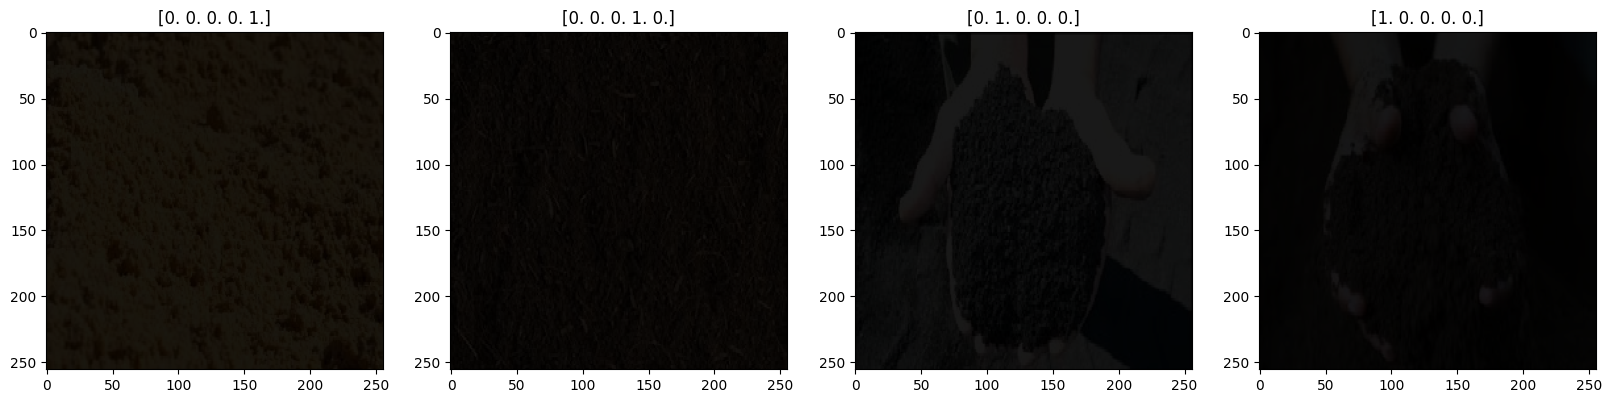

In [10]:
import matplotlib.pyplot as plt

batch = train.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

plt.show()

In [11]:
import tensorflow as tf

In [12]:
batch[0].shape

(4, 256, 256, 3)

In [13]:
#Using Sequential API

model = tf.keras.Sequential([tf.keras.layers.Conv2D(10, (3,3), 1, input_shape=(256, 256, 3)),
                             tf.keras.layers.MaxPooling2D(),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(5, activation='softmax')])

model.compile(loss='CategoricalCrossentropy', optimizer='Adam', metrics=['Accuracy'])

history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
31/31 [==============================] - 14s 39ms/step - loss: 1.3228 - Accuracy: 0.5161 - val_loss: 0.7234 - val_Accuracy: 0.7143
Epoch 2/20
31/31 [==============================] - 0s 12ms/step - loss: 0.4256 - Accuracy: 0.8548 - val_loss: 0.7854 - val_Accuracy: 0.6429
Epoch 3/20
31/31 [==============================] - 0s 11ms/step - loss: 0.2598 - Accuracy: 0.9435 - val_loss: 0.6121 - val_Accuracy: 0.6429
Epoch 4/20
31/31 [==============================] - 0s 11ms/step - loss: 0.1150 - Accuracy: 0.9919 - val_loss: 0.4415 - val_Accuracy: 0.8571
Epoch 5/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0744 - Accuracy: 1.0000 - val_loss: 0.4370 - val_Accuracy: 0.8571
Epoch 6/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0467 - Accuracy: 1.0000 - val_loss: 0.4277 - val_Accuracy: 0.8571
Epoch 7/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0338 - Accuracy: 1.0000 - val_loss: 0.4473 - val_Accuracy: 0.8571
Epoch 8/20
3

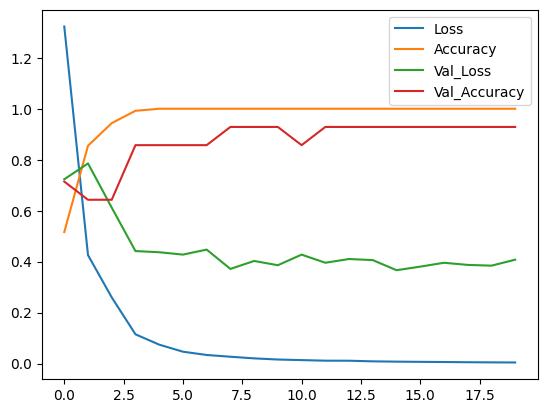

In [14]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['Accuracy'], label='Accuracy')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.plot(history.history['val_Accuracy'], label='Val_Accuracy')
plt.legend(loc="upper right")
plt.show()

In [15]:
#Using Functional API

input = tf.keras.Input(shape=(256, 256, 3))
x = tf.keras.layers.Conv2D(10, (3,3), 1)(input)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=input, outputs=output)

model.compile(loss='CategoricalCrossentropy', optimizer='Adam', metrics=['Accuracy'])

history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
31/31 [==============================] - 2s 21ms/step - loss: 1.4181 - Accuracy: 0.4032 - val_loss: 0.9120 - val_Accuracy: 0.6429
Epoch 2/20
31/31 [==============================] - 0s 11ms/step - loss: 0.4533 - Accuracy: 0.8145 - val_loss: 0.8243 - val_Accuracy: 0.5714
Epoch 3/20
31/31 [==============================] - 0s 11ms/step - loss: 0.2894 - Accuracy: 0.9032 - val_loss: 0.7690 - val_Accuracy: 0.7143
Epoch 4/20
31/31 [==============================] - 0s 11ms/step - loss: 0.1580 - Accuracy: 0.9758 - val_loss: 0.5634 - val_Accuracy: 0.7857
Epoch 5/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0830 - Accuracy: 1.0000 - val_loss: 0.5336 - val_Accuracy: 0.7857
Epoch 6/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0449 - Accuracy: 1.0000 - val_loss: 0.4829 - val_Accuracy: 0.7857
Epoch 7/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0309 - Accuracy: 1.0000 - val_loss: 0.5068 - val_Accuracy: 0.7857
Epoch 8/20
31

In [16]:
model.evaluate(test)

5/5 [==============================] - 0s 11ms/step - loss: 0.6223 - Accuracy: 0.7778


[0.6223486065864563, 0.7777777910232544]